<a href="https://colab.research.google.com/github/potuu/Implementation_of_A_Domain_Generative_Graph_Network_for_EEG_Based_Emotion_Recognition/blob/main/2023_Optimizing_1D_CNN_Based_Emotion_Recognition_Process_through_channel_and_feature_selection_from_EEG_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊🧠 EEG Verisi İşleme ve Duygu Tabanlı Sınıflandırma _(EEG Data Processing and Emotion-based Classification)_

## ⚙️ Veri Önişleme _(Data Preprocessing)_

In [1]:
!pip install mne
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import mne

import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Dosya yolu
input_folder_path ="/content/drive/MyDrive/eeg_database_kou/processed_data"
# Dosya adları listesi oluştur
input_file_list = [os.path.join(input_folder_path, f"S{i}_processed_data.csv") for i in range(1, 41)]

In [4]:
# Dosya yolu
input_folder_path ="/content/drive/MyDrive/eeg_database_kou/processed_data"
processed_label_path = "/content/drive/MyDrive/eeg_database_kou/label_processed_data.csv"
# Dosya adları listesi oluştur
input_file_list = [os.path.join(input_folder_path, f"S{i}_processed_data.csv") for i in range(1, 41)]

In [5]:
eeg_data_path = input_file_list  # input_file_list içindeki dosya yollarını kullan

# Tüm CSV dosyalarını birleştirme
EEGdata = pd.concat([pd.read_csv(file) for file in eeg_data_path])

# Orijinal verideki EEG sinyallerinin sütun adlarını alın
eeg_columns = [col for col in EEGdata.columns if col.startswith('EEG')]

# EEG sinyallerini NumPy dizisine dönüştürün
eeg_data = EEGdata[eeg_columns].values

# Veriyi gösterme
EEGdata

,user_id,Timestamp,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.868602880+03:00,4020.000000,4268.205078,3799.487061,4109.743652,4105.641113,4109.230957,4060.512939,4056.923096,3908.718018,4536.410156,4517.948730,4373.333496,4124.615234,4655.384766
1,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.876523008+03:00,4020.000000,4270.769043,3797.435791,4106.666504,4103.589844,4106.666504,4062.564209,4066.153809,3918.974365,4537.436035,4521.025879,4376.410156,4124.615234,4656.922852
2,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.884342784+03:00,4012.307617,4265.641113,3790.256348,4101.025879,4103.077148,4102.563965,4069.743652,4071.281982,3922.051270,4534.871582,4515.897461,4373.846191,4119.487305,4648.205078
3,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.892262912+03:00,4007.692383,4260.512695,3787.179443,4102.051270,4104.102539,4101.538574,4070.769287,4074.358887,3922.564209,4536.922852,4512.307617,4370.256348,4116.410156,4645.641113
4,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.900082944+03:00,4011.794922,4262.051270,3789.230713,4105.641113,4104.102539,4100.512695,4068.718018,4076.410156,3924.615479,4538.461426,4518.461426,4373.333496,4118.461426,4651.282227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74235,4737537c-0a5d-46e2-9c1f-9872520872c4,2023-12-14 10:40:45.713638912+03:00,4040.512939,4265.128418,3771.794922,4127.179688,4115.897461,4181.538574,4122.563965,4127.179688,3935.384521,4653.333496,4491.282227,4543.077148,4137.436035,4623.589844
74236,4737537c-0a5d-46e2-9c1f-9872520872c4,2023-12-14 10:40:45.721458944+03:00,4037.435791,4256.410156,3759.487061,4126.153809,4114.871582,4184.102539,4136.410156,4126.666504,3927.179443,4656.922852,4490.769043,4545.641113,4142.051270,4616.410156
74237,4737537c-0a5d-46e2-9c1f-9872520872c4,2023-12-14 10:40:45.729278976+03:00,4047.179443,4254.358887,3761.538574,4122.051270,4098.974121,4187.692383,4136.922852,4138.974121,3924.102539,4648.205078,4490.256348,4552.307617,4137.436035,4618.461426
74238,4737537c-0a5d-46e2-9c1f-9872520872c4,2023-12-14 10:40:45.737097984+03:00,4055.384521,4255.384766,3766.153809,4120.000000,4094.358887,4177.948730,4124.102539,4144.102539,3925.641113,4643.589844,4491.282227,4552.820313,4133.846191,4624.102539


In [6]:
# EEGdata DataFrame'inin satır ve sütun sayısını gösterme
print("DataFrame'in satır ve sütun sayısı:", EEGdata.shape)

# Sadece satır sayısını gösterme
print("DataFrame'in satır sayısı:", EEGdata.shape[0])

DataFrame'in satır ve sütun sayısı: (2969600, 16)
DataFrame'in satır sayısı: 2969600


In [7]:
# Örnekleme frekansı
sfreq = 128  # Örneklem frekansı 128 Hz olarak güncellendi

# Kanal adlarını ve örnekleme frekansını içeren info yapısı oluşturun
info = mne.create_info(eeg_columns, sfreq=sfreq, ch_types='eeg')

# MNE RawArray oluşturun
raw = mne.io.RawArray(eeg_data.T, info)

Creating RawArray with float64 data, n_channels=14, n_times=2969600
    Range : 0 ... 2969599 =      0.000 ... 23199.992 secs
Ready.


In [8]:
# Band geçiren filtreleme parametreleri
l_freq = 1  # Alçak geçiren frekans (Hz)
h_freq = 50  # Yüksek geçiren frekans (Hz)

# Band geçiren filtreyi uygulayın
raw.filter(l_freq=l_freq, h_freq=h_freq, fir_design='firwin')

# Filtrelenmiş EEG verisini alın
filtered_eeg_data = raw.get_data().T

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 s)



In [9]:
# Filtrelenmiş EEG verilerini orijinal DataFrame'e yerleştirme
EEGdata[eeg_columns] = filtered_eeg_data

# Yeniden düzenlenmiş DataFrame'i gösterme
EEGdata.head()

,user_id,Timestamp,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.868602880+03:00,-5.413447e-13,5.702105e-13,-5.209166e-13,-1.779910e-12,-7.505108e-13,1.847411e-13,-1.122658e-12,-5.435652e-13,-1.041389e-12,-7.389644e-13,-1.175060e-12,-3.996803e-13,-6.825651e-13,-8.250067e-13
1,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.876523008+03:00,1.327446e-01,2.861636e+00,-1.696914e+00,-2.966742e+00,-1.865474e+00,-2.284063e+00,1.703763e+00,9.058783e+00,1.021550e+01,1.360953e+00,2.645846e+00,3.636566e+00,-3.764295e-02,1.457848e+00
2,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.884342784+03:00,-7.363821e+00,-1.996416e+00,-8.455596e+00,-8.308114e+00,-2.194451e+00,-5.940702e+00,8.453681e+00,1.411554e+01,1.307344e+01,-7.910127e-01,-2.998246e+00,1.683769e+00,-5.271994e+00,-7.209147e+00
3,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.892262912+03:00,-1.188552e+01,-6.792592e+00,-1.122390e+01,-7.341483e+00,-9.746571e-01,-6.832067e+00,9.182998e+00,1.693676e+01,1.369936e+01,1.544562e+00,-6.865998e+00,-1.385877e+00,-8.305614e+00,-9.878456e+00
4,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2023-10-11 12:45:06.900082944+03:00,-7.569373e+00,-5.009241e+00,-8.740975e+00,-3.332694e+00,-8.048741e-01,-7.313686e+00,6.679344e+00,1.898024e+01,1.543030e+01,3.510987e+00,-1.363394e+00,2.338602e+00,-6.441840e+00,-4.217861e+00


In [16]:
# Kullanıcı ve duygu durumu verilerini yükleme
timeinfo_label_path = "/content/drive/MyDrive/eeg_database_kou/label_processed_data.csv"  # Kullanıcı ve duygu durumu verilerinin bulunduğu Excel dosyasının yolu
timeinfo_label = pd.read_csv(timeinfo_label_path, sep=';')
timeinfo_label.head()

,user_id,trail,start_date,finish_date,duration,val,aro,dom
0,7a4efc4f-6def-4ba3-a56d-672aec0fe324,1,2023-10-11 12:45:06.863000,2023-10-11 12:45:35.888000,29,1,0,1
1,7a4efc4f-6def-4ba3-a56d-672aec0fe324,2,2023-10-11 12:45:41.053000,2023-10-11 12:46:10.055000,29,0,1,1
2,7a4efc4f-6def-4ba3-a56d-672aec0fe324,3,2023-10-11 12:46:15.225000,2023-10-11 12:46:44.240000,29,1,1,0
3,7a4efc4f-6def-4ba3-a56d-672aec0fe324,4,2023-10-11 12:46:49.414000,2023-10-11 12:47:18.427000,29,0,1,1
4,7a4efc4f-6def-4ba3-a56d-672aec0fe324,5,2023-10-11 12:47:33.596000,2023-10-11 12:48:02.605000,29,1,0,0


In [17]:
# 'val' ve 'aro' sütunlarını yazdırma
print("Val ve Aro Sütunları:")
print(timeinfo_label[['val', 'aro']])


Val ve Aro Sütunları:
     val  aro
0      1    0
1      0    1
2      1    1
3      0    1
4      1    0
..   ...  ...
795    0    1
796    1    1
797    0    1
798    1    1
799    0    1

[800 rows x 2 columns]


In [18]:
# Veri çerçevesindeki tüm sütunları kontrol et
print(timeinfo_label.columns)


Index(['user_id', 'trail', 'start_date', 'finish_date', 'duration', 'val',
       'aro', 'dom'],
      dtype='object')


In [19]:
import numpy as np
import pandas as pd

# 'val' ve 'aro' sütunlarında sadece 0 ve 1 olup olmadığını ve sayısal (integer) olup olmadığını kontrol etme
def check_valid_values_and_types(df, columns):
    for column in columns:
        # Sayısal tipte (int veya float) olup olmadığını kontrol etme
        if not pd.api.types.is_numeric_dtype(df[column]):
            print(f"Uyarı: '{column}' sütununda sayısal olmayan değerler bulunuyor!")

        # Geçerli (0 veya 1) olan değerlerin sayısını yazdırma
        count_zeros = (df[column] == 0).sum()  # 0'ların sayısı
        count_ones = (df[column] == 1).sum()   # 1'lerin sayısı
        print(f"'{column}' sütunundaki değerlerin sayısı:")
        print(f"  - 0: {count_zeros}")
        print(f"  - 1: {count_ones}")

        # Eğer geçersiz değerler varsa (0 ve 1 dışında bir değer)
        if not all(df[column].isin([0, 1])):
            print(f"Uyarı: '{column}' sütununda geçersiz değerler bulunuyor!")
            invalid_values = df[~df[column].isin([0, 1])]
            print(f"Geçersiz değerler:")
            print(invalid_values)
        else:
            print(f"'{column}' sütununda yalnızca geçerli değerler (0 ve 1) bulunuyor.")
        print()  # Satır boşluğu ekleyerek daha düzenli görünmesini sağlıyoruz

# 'val' ve 'aro' sütunlarında sadece 0 ve 1 olup olmadığını, ayrıca sayısal olup olmadığını kontrol et
check_valid_values_and_types(timeinfo_label, ['val', 'aro'])


'val' sütunundaki değerlerin sayısı:
  - 0: 374
  - 1: 426
'val' sütununda yalnızca geçerli değerler (0 ve 1) bulunuyor.

'aro' sütunundaki değerlerin sayısı:
  - 0: 327
  - 1: 473
'aro' sütununda yalnızca geçerli değerler (0 ve 1) bulunuyor.



In [20]:
# EEGdata ve timeinfo_label DataFrame'lerinin sütun isimlerini kontrol edelim
print("EEGdata sütunları:", EEGdata.columns)
print("timeinfo_label sütunları:", timeinfo_label.columns)


EEGdata sütunları: Index(['user_id', 'Timestamp', 'EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5',
       'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6',
       'EEG.F4', 'EEG.F8', 'EEG.AF4'],
      dtype='object')
timeinfo_label sütunları: Index(['user_id', 'trail', 'start_date', 'finish_date', 'duration', 'val',
       'aro', 'dom'],
      dtype='object')


In [21]:
# EEGdata DataFrame'ine trail sütununu eklemek
EEGdata['trail'] = EEGdata.groupby('user_id').cumcount() + 1

# Birleştirme işlemini tekrar yapma
merged_data = pd.merge(EEGdata, timeinfo_label, on=['user_id', 'trail'])

# Birleştirilmiş veriyi kontrol etme
print(merged_data.head())


                                user_id                            Timestamp  \
0  7a4efc4f-6def-4ba3-a56d-672aec0fe324  2023-10-11 12:45:06.868602880+03:00   
1  7a4efc4f-6def-4ba3-a56d-672aec0fe324  2023-10-11 12:45:06.876523008+03:00   
2  7a4efc4f-6def-4ba3-a56d-672aec0fe324  2023-10-11 12:45:06.884342784+03:00   
3  7a4efc4f-6def-4ba3-a56d-672aec0fe324  2023-10-11 12:45:06.892262912+03:00   
4  7a4efc4f-6def-4ba3-a56d-672aec0fe324  2023-10-11 12:45:06.900082944+03:00   

        EEG.AF3        EEG.F7        EEG.F3       EEG.FC5        EEG.T7  \
0 -5.413447e-13  5.702105e-13 -5.209166e-13 -1.779910e-12 -7.505108e-13   
1  1.327446e-01  2.861636e+00 -1.696914e+00 -2.966742e+00 -1.865474e+00   
2 -7.363821e+00 -1.996416e+00 -8.455596e+00 -8.308114e+00 -2.194451e+00   
3 -1.188552e+01 -6.792592e+00 -1.122390e+01 -7.341483e+00 -9.746571e-01   
4 -7.569373e+00 -5.009241e+00 -8.740975e+00 -3.332694e+00 -8.048741e-01   

         EEG.P7        EEG.O1        EEG.O2  ...        EEG.F4      

In [22]:
merged_data.columns

Index(['user_id', 'Timestamp', 'EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5',
       'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6',
       'EEG.F4', 'EEG.F8', 'EEG.AF4', 'trail', 'start_date', 'finish_date',
       'duration', 'val', 'aro', 'dom'],
      dtype='object')

In [23]:
merged_data= merged_data.drop(['dom','Timestamp', 'duration'], axis=1)

In [24]:
grouped_data = merged_data.groupby(['user_id', 'trail']).agg(list).reset_index()
grouped_data.head()

,user_id,trail,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,start_date,finish_date,val,aro
0,06f49575-a0ee-46fd-8d0d-4133886d62a5,1,[-49.13398487291607],[-71.06043390698642],[-53.875185425605906],[-19.870009042606284],[-28.412295656575125],[3.807775804300647],[-61.43303952865932],[-47.258499524591144],[-35.473732837511506],[449.7120441039482],[-39.605138852654306],[-36.3994275721565],[1.0871746950381436],[-45.065655408452045],[2023-10-20 10:48:21.305000],[2023-10-20 10:48:50.327000],[1],[0]
1,06f49575-a0ee-46fd-8d0d-4133886d62a5,2,[-66.41948397667068],[-99.6613560148508],[-73.48203150974616],[-34.4368197617229],[-41.66959962334853],[-2.3179952757656253],[-83.0605942805342],[-67.04550889066832],[-52.67112122318342],[537.4207701373393],[-58.05774900102594],[-52.88950725702199],[-5.055114407890997],[-63.038052099880716],[2023-10-20 10:48:56.135000],[2023-10-20 10:49:24.542000],[0],[0]
2,06f49575-a0ee-46fd-8d0d-4133886d62a5,3,[-48.74810931245845],[-77.38916310483422],[-50.86327130806258],[-23.979780276004675],[-23.8420494161105],[8.377707176833042],[-59.28845536653296],[-46.67171028428206],[-37.568573067863255],[439.63267026288366],[-42.7710803629126],[-39.019709365543505],[1.7551399371462253],[-48.56924226215989],[2023-10-20 10:49:29.728000],[2023-10-20 10:49:58.731000],[1],[0]
3,06f49575-a0ee-46fd-8d0d-4133886d62a5,4,[-47.17866993719396],[-88.19891646203652],[-63.511499591737646],[-26.275392307137494],[-30.89429922185296],[-0.9209101838075355],[-72.51209000546231],[-55.936728431074116],[-45.82100203565018],[514.5426863840628],[-49.50365807558575],[-45.53947143436912],[-2.4255179825359363],[-49.34586830384082],[2023-10-20 10:50:03.981000],[2023-10-20 10:50:33.021000],[0],[0]
4,06f49575-a0ee-46fd-8d0d-4133886d62a5,5,[-40.16205431767412],[-75.80727928233028],[-50.03020210566423],[-21.312698447798567],[-24.981900585066157],[-1.0658401581919037],[-62.912732158468444],[-42.975704298060194],[-33.28708039851868],[451.5042870835757],[-38.37910099015865],[-35.140253152654324],[0.16442314292410742],[-41.47433969774747],[2023-10-20 10:50:48.308000],[2023-10-20 10:51:17.329000],[1],[1]


In [25]:
Labeled_Group_EEGSignals = pd.merge(grouped_data, timeinfo_label, on=['trail', 'user_id'])
Labeled_Group_EEGSignals = Labeled_Group_EEGSignals.drop(['trail', 'user_id'], axis=1)

Labeled_Group_EEGSignals.head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,...,start_date_x,finish_date_x,val_x,aro_x,start_date_y,finish_date_y,duration,val_y,aro_y,dom
0,[-49.13398487291607],[-71.06043390698642],[-53.875185425605906],[-19.870009042606284],[-28.412295656575125],[3.807775804300647],[-61.43303952865932],[-47.258499524591144],[-35.473732837511506],[449.7120441039482],...,[2023-10-20 10:48:21.305000],[2023-10-20 10:48:50.327000],[1],[0],2023-10-20 10:48:21.305000,2023-10-20 10:48:50.327000,29,1,0,1
1,[-66.41948397667068],[-99.6613560148508],[-73.48203150974616],[-34.4368197617229],[-41.66959962334853],[-2.3179952757656253],[-83.0605942805342],[-67.04550889066832],[-52.67112122318342],[537.4207701373393],...,[2023-10-20 10:48:56.135000],[2023-10-20 10:49:24.542000],[0],[0],2023-10-20 10:48:56.135000,2023-10-20 10:49:24.542000,29,0,0,1
2,[-48.74810931245845],[-77.38916310483422],[-50.86327130806258],[-23.979780276004675],[-23.8420494161105],[8.377707176833042],[-59.28845536653296],[-46.67171028428206],[-37.568573067863255],[439.63267026288366],...,[2023-10-20 10:49:29.728000],[2023-10-20 10:49:58.731000],[1],[0],2023-10-20 10:49:29.728000,2023-10-20 10:49:58.731000,29,1,0,0
3,[-47.17866993719396],[-88.19891646203652],[-63.511499591737646],[-26.275392307137494],[-30.89429922185296],[-0.9209101838075355],[-72.51209000546231],[-55.936728431074116],[-45.82100203565018],[514.5426863840628],...,[2023-10-20 10:50:03.981000],[2023-10-20 10:50:33.021000],[0],[0],2023-10-20 10:50:03.981000,2023-10-20 10:50:33.021000,29,0,0,0
4,[-40.16205431767412],[-75.80727928233028],[-50.03020210566423],[-21.312698447798567],[-24.981900585066157],[-1.0658401581919037],[-62.912732158468444],[-42.975704298060194],[-33.28708039851868],[451.5042870835757],...,[2023-10-20 10:50:48.308000],[2023-10-20 10:51:17.329000],[1],[1],2023-10-20 10:50:48.308000,2023-10-20 10:51:17.329000,29,1,1,1


In [ ]:
#                    EEG.AF3                 EEG.F7                 EEG.F3  \
# 0     [-49.13398487291607]   [-71.06043390698642]  [-53.875185425605906]
# 1     [-66.41948397667068]    [-99.6613560148508]   [-73.48203150974616]
# 2     [-48.74810931245845]   [-77.38916310483422]   [-50.86327130806258]
# 3     [-47.17866993719396]   [-88.19891646203652]  [-63.511499591737646]
# 4     [-40.16205431767412]   [-75.80727928233028]   [-50.03020210566423]

#                    EEG.FC5                 EEG.T7                 EEG.P7  \
# 0    [-19.870009042606284]  [-28.412295656575125]    [3.807775804300647]
# 1      [-34.4368197617229]   [-41.66959962334853]  [-2.3179952757656253]
# 2    [-23.979780276004675]    [-23.8420494161105]    [8.377707176833042]
# 3    [-26.275392307137494]   [-30.89429922185296]  [-0.9209101838075355]
# 4    [-21.312698447798567]  [-24.981900585066157]  [-1.0658401581919037]

#                EEG.O1                 EEG.O2                 EEG.P8  \
# 0     [-61.43303952865932]  [-47.258499524591144]  [-35.473732837511506]
# 1      [-83.0605942805342]   [-67.04550889066832]   [-52.67112122318342]
# 2     [-59.28845536653296]   [-46.67171028428206]  [-37.568573067863255]
# 3     [-72.51209000546231]  [-55.936728431074116]   [-45.82100203565018]
# 4    [-62.912732158468444]  [-42.975704298060194]   [-33.28708039851868]

#                    EEG.T8  ...                 EEG.F8                EEG.AF4  \
# 0     [449.7120441039482]  ...   [1.0871746950381436]  [-45.065655408452045]
# 1     [537.4207701373393]  ...   [-5.055114407890997]  [-63.038052099880716]
# 2    [439.63267026288366]  ...   [1.7551399371462253]   [-48.56924226215989]
# 3     [514.5426863840628]  ...  [-2.4255179825359363]   [-49.34586830384082]
# 4     [451.5042870835757]  ...  [0.16442314292410742]   [-41.47433969774747]



#                      start_date_x                 finish_date_x aro_class_x  \
# 0    [2023-10-20 10:48:21.305000]  [2023-10-20 10:48:50.327000]           0
# 1    [2023-10-20 10:48:56.135000]  [2023-10-20 10:49:24.542000]           0
# 2    [2023-10-20 10:49:29.728000]  [2023-10-20 10:49:58.731000]           0
# 3    [2023-10-20 10:50:03.981000]  [2023-10-20 10:50:33.021000]           0
# 4    [2023-10-20 10:50:48.308000]  [2023-10-20 10:51:17.329000]           0

#                      start_date_x                 finish_date_x aro_class_x  \
# 0    [2023-10-20 10:48:21.305000]  [2023-10-20 10:48:50.327000]           0
# 1    [2023-10-20 10:48:56.135000]  [2023-10-20 10:49:24.542000]           0
# 2    [2023-10-20 10:49:29.728000]  [2023-10-20 10:49:58.731000]           0
# 3    [2023-10-20 10:50:03.981000]  [2023-10-20 10:50:33.021000]           0
# 4    [2023-10-20 10:50:48.308000]  [2023-10-20 10:51:17.329000]           0

#    aro_class_y val_class_y
# 0             0           0
# 1             0           0
# 2             0           0
# 3             0           0
# 4             0           0



In [26]:
# Geçersiz ve NaN değerleri kontrol etme
for column in ['val_x', 'aro_x', 'val_y', 'aro_y']:
    # 0'ların sayısı
    count_zeros = (Labeled_Group_EEGSignals[column] == 0).sum()
    # 1'lerin sayısı
    count_ones = (Labeled_Group_EEGSignals[column] == 1).sum()

    # NaN değerlerin sayısı
    count_nan = Labeled_Group_EEGSignals[column].isna().sum()

    # Geçersiz değerler (0 ve 1 dışında olan değerler)
    invalid_values = Labeled_Group_EEGSignals[~Labeled_Group_EEGSignals[column].isin([0, 1])]
    count_invalid = invalid_values.shape[0]

    # Sonuçları yazdırma
    print(f"Column '{column}':")
    print(f"  - 0: {count_zeros}")
    print(f"  - 1: {count_ones}")
    print(f"  - NaN: {count_nan}")
    print(f"  - Geçersiz Değerler: {count_invalid}")

    # Eğer geçersiz değerler varsa, bunları ekrana yazdır
    if count_invalid > 0:
        print("Geçersiz Değerler (örnekler):")
        print(invalid_values.head())  # Geçersiz değerlerden ilk birkaçını göster

    print()  # Satır boşluğu ekleyerek daha düzenli görünmesini sağlıyoruz


Column 'val_x':
  - 0: 0
  - 1: 0
  - NaN: 0
  - Geçersiz Değerler: 800
Geçersiz Değerler (örnekler):
                EEG.AF3                EEG.F7                 EEG.F3  \
0  [-49.13398487291607]  [-71.06043390698642]  [-53.875185425605906]   
1  [-66.41948397667068]   [-99.6613560148508]   [-73.48203150974616]   
2  [-48.74810931245845]  [-77.38916310483422]   [-50.86327130806258]   
3  [-47.17866993719396]  [-88.19891646203652]  [-63.511499591737646]   
4  [-40.16205431767412]  [-75.80727928233028]   [-50.03020210566423]   

                 EEG.FC5                 EEG.T7                 EEG.P7  \
0  [-19.870009042606284]  [-28.412295656575125]    [3.807775804300647]   
1    [-34.4368197617229]   [-41.66959962334853]  [-2.3179952757656253]   
2  [-23.979780276004675]    [-23.8420494161105]    [8.377707176833042]   
3  [-26.275392307137494]   [-30.89429922185296]  [-0.9209101838075355]   
4  [-21.312698447798567]  [-24.981900585066157]  [-1.0658401581919037]   

                  EE

In [27]:
Labeled_Group_EEGSignals.shape


(800, 24)

In [ ]:
labeled_group_EEGSignals

NameError: name 'labeled_group_EEGSignals' is not defined

In [48]:
pip install tensorflow scikit-learn pandas numpy matplotlib seaborn


In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, AveragePooling1D, Dropout, Flatten, Dense, Input

In [121]:
data.columns

Index(['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
       'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4',
       'val_y', 'aro_y'],
      dtype='object')

In [129]:
data.head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,val_y,aro_y
0,[-49.13398487291607],[-71.06043390698642],[-53.875185425605906],[-19.870009042606284],[-28.412295656575125],[3.807775804300647],[-61.43303952865932],[-47.258499524591144],[-35.473732837511506],[449.7120441039482],[-39.605138852654306],[-36.3994275721565],[1.0871746950381436],[-45.065655408452045],1,0
1,[-66.41948397667068],[-99.6613560148508],[-73.48203150974616],[-34.4368197617229],[-41.66959962334853],[-2.3179952757656253],[-83.0605942805342],[-67.04550889066832],[-52.67112122318342],[537.4207701373393],[-58.05774900102594],[-52.88950725702199],[-5.055114407890997],[-63.038052099880716],0,0
2,[-48.74810931245845],[-77.38916310483422],[-50.86327130806258],[-23.979780276004675],[-23.8420494161105],[8.377707176833042],[-59.28845536653296],[-46.67171028428206],[-37.568573067863255],[439.63267026288366],[-42.7710803629126],[-39.019709365543505],[1.7551399371462253],[-48.56924226215989],1,0
3,[-47.17866993719396],[-88.19891646203652],[-63.511499591737646],[-26.275392307137494],[-30.89429922185296],[-0.9209101838075355],[-72.51209000546231],[-55.936728431074116],[-45.82100203565018],[514.5426863840628],[-49.50365807558575],[-45.53947143436912],[-2.4255179825359363],[-49.34586830384082],0,0
4,[-40.16205431767412],[-75.80727928233028],[-50.03020210566423],[-21.312698447798567],[-24.981900585066157],[-1.0658401581919037],[-62.912732158468444],[-42.975704298060194],[-33.28708039851868],[451.5042870835757],[-38.37910099015865],[-35.140253152654324],[0.16442314292410742],[-41.47433969774747],1,1


In [127]:
print(len(data))


800


In [130]:
# Veri Yükleme ve Ön İşleme
data = Labeled_Group_EEGSignals
data = data.drop(columns=["start_date_x", "finish_date_x", "val_x", "aro_x", "start_date_y", "finish_date_y", "duration", "dom"])

# EEG sinyalleri ve hedef değişkenler
X = np.stack(
    data[[col for col in data.columns if col.startswith("EEG.")]].applymap(
        lambda x: np.array(x) if isinstance(x, list) else np.array(eval(str(x)))
    ).values
)
X = np.array([np.stack(item) for item in X])  # Ensure proper 3D structure

if X.shape[1] == 0 or X.shape[2] == 0:
    raise ValueError("Invalid EEG signal dimensions. Check preprocessing and data structure.")

y_val = data["val_y"].values
y_aro = data["aro_y"].values

<ipython-input-130-359d92230ba0>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[[col for col in data.columns if col.startswith("EEG.")]].applymap(


In [123]:
# Veri Bölme
X_train, X_test, y_val_train, y_val_test = train_test_split(
    X, y_val, test_size=0.2, random_state=42
)
_, _, y_aro_train, y_aro_test = train_test_split(
    X, y_aro, test_size=0.2, random_state=42
)

In [124]:
from tensorflow.keras.layers import GlobalAveragePooling1D

def create_model(input_shape, output_units, output_activation):
    model = Sequential()
    model.add(Input(shape=input_shape))

    # 1D Konvolüsyonel Katmanlar
    model.add(Conv1D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Conv1D(32, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Conv1D(32, kernel_size=2, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Conv1D(16, kernel_size=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    # Use GlobalAveragePooling1D instead of AveragePooling1D
    model.add(GlobalAveragePooling1D())

    # Fully Connected Katmanlar
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(output_units, activation=output_activation))

    return model


In [125]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_17 (Conv1D)                   │ (None, 14, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 7, 32)               │          10,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 3, 32)               │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 3, 16)               │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 3, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,554 (68.57 KB)

 Trainable params: 17,554 (68.57 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
# Binary Classification için Model (val_y)
input_shape = (X_train.shape[1], X_train.shape[2])
if input_shape[0] <= 1:
    raise ValueError("Input shape is too small for convolutional operations.")

model_val = create_model(input_shape, output_units=1, output_activation='sigmoid')
model_val.compile(optimizer='Adadelta', loss='binary_crossentropy', metrics=['accuracy'])
model_val.fit(X_train, y_val_train, validation_split=0.2, epochs=50, batch_size=32)

# Binary Classification için Model (aro_y)
model_aro = create_model(input_shape, output_units=1, output_activation='sigmoid')
model_aro.compile(optimizer='Adadelta', loss='binary_crossentropy', metrics=['accuracy'])
model_aro.fit(X_train, y_aro_train, validation_split=0.2, epochs=50, batch_size=32)

IndexError: tuple index out of range

In [99]:
# Değerlendirme
val_pred = model_val.predict(X_test)
aro_pred = model_aro.predict(X_test)

print("Classification Report for val_y")
print(classification_report(y_val_test, val_pred.round()))
print("ROC-AUC for val_y:", roc_auc_score(y_val_test, val_pred))

print("Classification Report for aro_y")
print(classification_report(y_aro_test, aro_pred.round()))
print("ROC-AUC for aro_y:", roc_auc_score(y_aro_test, aro_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Classification Report for val_y
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        68
           1       0.59      1.00      0.74        92

    accuracy                           0.59       160
   macro avg       0.79      0.52      0.41       160
weighted avg       0.76      0.59      0.46       160

ROC-AUC for val_y: 0.5796035805626598
Classification Report for aro_y
              precision    recall  f1-score   support

           0       0.19      0.05      0.08        58
           1       0.62      0.87      0.72       102

    accuracy                           0.57       160
   macro avg       0.40      0.46      0.40       160
weighted avg       0.46      0.57      0.49       160

ROC-AUC for aro_y: 0.4440500338066261


MultiClass

In [104]:
y_val_mc = np.where(y_val == 1, 0, np.where(y_val == 2, 1, 2))  # Converting to 3-class labels for example
y_aro_mc = np.where(y_aro == 1, 0, np.where(y_aro == 2, 1, 2))  # Converting to 3-class labels for example

# Veri Bölme for Multi-Class Classification
X_train_mc, X_test_mc, y_val_train_mc, y_val_test_mc = train_test_split(
    X, y_val_mc, test_size=0.2, random_state=42
)
_, _, y_aro_train_mc, y_aro_test_mc = train_test_split(
    X, y_aro_mc, test_size=0.2, random_state=42
)

In [108]:
def create_model_multiclass(input_shape, output_units, output_activation):
    model = Sequential()
    model.add(Input(shape=input_shape))

    # 1D Konvolüsyonel Katmanlar
    model.add(Conv1D(64, kernel_size=5, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling1D(pool_size=2, padding='same'))  # Added padding='same'
    model.add(Dropout(0.25))

    model.add(Conv1D(32, kernel_size=5, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling1D(pool_size=2, padding='same'))  # Added padding='same'
    model.add(Dropout(0.25))

    model.add(Conv1D(32, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling1D(pool_size=2, padding='same'))  # Added padding='same'
    model.add(Dropout(0.25))

    model.add(Conv1D(16, kernel_size=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling1D(pool_size=2, padding='same'))  # Added padding='same'
    model.add(Dropout(0.25))

    # Fully Connected Katmanlar
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(output_units, activation=output_activation))

    return model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_17 (Conv1D)                   │ (None, 14, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 7, 32)               │          10,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 3, 32)               │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 3, 16)               │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 3, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,554 (68.57 KB)

 Trainable params: 17,554 (68.57 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
# Create and compile the multi-class model
input_shape = (X_train_mc.shape[1], X_train_mc.shape[2])

# Model for multi-class classification (val_y)
model_val_mc = create_model_multiclass(input_shape, output_units=3, output_activation='softmax')
model_val_mc.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_val_mc.fit(X_train_mc, y_val_train_mc, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.2558 - loss: 1.1529 - val_accuracy: 0.5469 - val_loss: 1.0223
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5102 - loss: 0.9646 - val_accuracy: 0.5625 - val_loss: 0.9818
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4736 - loss: 0.8714 - val_accuracy: 0.5703 - val_loss: 0.9387
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5294 - loss: 0.8083 - val_accuracy: 0.5391 - val_loss: 0.8963
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5131 - loss: 0.7781 - val_accuracy: 0.5469 - val_loss: 0.8469
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4936 - loss: 0.7544 - val_accuracy: 0.5469 - val_loss: 0.8080
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5197 - loss: 0.7310 - val_accuracy: 0.5469 - val_loss: 0.7738
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5326 - loss: 0.7228 - val_accuracy: 0.5000 - v

In [120]:
# Make predictions on the test set
y_val_pred_mc = model_val_mc.predict(X_test_mc)
y_val_pred_mc = np.argmax(y_val_pred_mc, axis=1)

# Classification Report
print("Classification Report for val_y (Multi-Class)")
print(classification_report(y_val_test_mc, y_val_pred_mc))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report for val_y (Multi-Class)
              precision    recall  f1-score   support

           0       0.68      0.23      0.34        92
           2       0.45      0.85      0.59        68

    accuracy                           0.49       160
   macro avg       0.56      0.54      0.47       160
weighted avg       0.58      0.49      0.45       160



<ipython-input-128-5eb3a2d9e440>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[[col for col in data.columns if col.startswith("EEG.")]].applymap(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.4734 - loss: 0.7087 - val_accuracy: 0.4375 - val_loss: 0.6986
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5628 - loss: 0.6943 - val_accuracy: 0.5125 - val_loss: 0.6965
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4999 - loss: 0.6974 - val_accuracy: 0.4688 - val_loss: 0.6959
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4936 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5024 - loss: 0.6971 - val_accuracy: 0.5063 - val_loss: 0.6949
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4963 - loss: 0.6943 - val_accuracy: 0.4563 - val_loss: 0.6985
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5097 - loss: 0.6938 - val_accuracy: 0.4938 - val_loss: 0.6975
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5393 - loss: 0.6895 - val_accuracy: 0.5000 - 

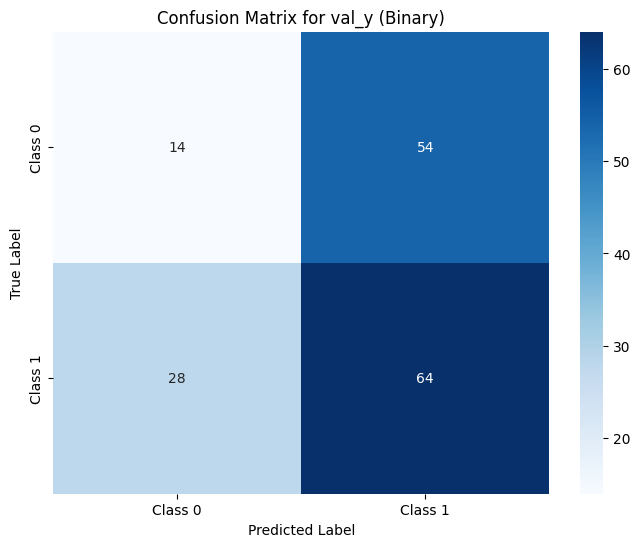

ROC-AUC for val_y: 0.45076726342711


In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, AveragePooling1D, Dropout, Flatten, Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Veri Yükleme ve Ön İşleme
data = Labeled_Group_EEGSignals
data = data.drop(columns=["start_date_x", "finish_date_x", "val_x", "aro_x", "start_date_y", "finish_date_y", "duration", "dom"])

# EEG sinyalleri ve hedef değişkenler
X = np.stack(
    data[[col for col in data.columns if col.startswith("EEG.")]].applymap(
        lambda x: np.array(x) if isinstance(x, list) else np.array(eval(str(x)))
    ).values
)
X = np.array([np.stack(item) for item in X])  # Ensure proper 3D structure

# Hedef Değişkenler
y_val = data["val_y"].values
y_aro = data["aro_y"].values

# Eğitim ve Test Verisine Ayırma
X_train, X_test, y_val_train, y_val_test = train_test_split(X, y_val, test_size=0.2, random_state=42)
X_train, X_test, y_aro_train, y_aro_test = train_test_split(X, y_aro, test_size=0.2, random_state=42)

# Model için fonksiyon (Binary Classification)
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(64, 5, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling1D(2))
    model.add(Dropout(0.25))

    model.add(Conv1D(32, 5, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling1D(2))
    model.add(Dropout(0.25))

    model.add(Conv1D(16, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling1D(2))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid output for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Modeli Eğitmek (val_y için)
model_val = create_model(X_train.shape[1:])
model_val.fit(X_train, y_val_train, epochs=10, batch_size=32, validation_data=(X_test, y_val_test))

# Modeli Değerlendirmek
y_val_pred = model_val.predict(X_test)
y_val_pred = (y_val_pred > 0.5).astype(int)  # Binarize output

# Classification Report ve Confusion Matrix
print("Classification Report for val_y (Binary)")
print(classification_report(y_val_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_val_test, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix for val_y (Binary)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC-AUC Skoru
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val_test, y_val_pred)
print(f"ROC-AUC for val_y: {roc_auc}")
